# Machine Learning Template

In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
classification_dataset = datasets.load_iris()
classification_dataset_attributes = classification_dataset.keys()
classification_dataset_attributes

dict_keys(['DESCR', 'target_names', 'data', 'target', 'feature_names'])

In [3]:
regression_dataset = datasets.load_boston()
regression_dataset_attributes = regression_dataset.keys()
regression_dataset_attributes

dict_keys(['DESCR', 'data', 'target', 'feature_names'])

#### Configuration and Variables - only for default Model Tuning Parameters

In [45]:
TEST_SIZE = .3
RANDOM_STATE = 100
# PROBLEM_TYPE = 'CLASSIFICATION'
PROBLEM_TYPE = 'REGRESSION'
regression_models = [
    linear_model.LinearRegression,
    linear_model.Lasso
]
classification_models = [
    tree.DecisionTreeClassifier,
    linear_model.LogisticRegression
]


X, y, models = None, None, None

In [46]:
if PROBLEM_TYPE == 'REGRESSION':
    X, y = regression_dataset['data'], regression_dataset['target']
    models = regression_models
    
elif PROBLEM_TYPE == 'CLASSIFICATION':
    X, y = classification_dataset['data'], classification_dataset['target']
    models = classification_models

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [48]:
for model in models:
    estimator = model()
    estimator.fit(X_train, y_train)
    score = estimator.score(X_test, y_test) * 100
    print("Model=", model.__name__)
    print("Configuration=", estimator)
    print("Score=", score)
    print("-"*80)

Model= LinearRegression
Configuration= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score= 70.57383776682713
--------------------------------------------------------------------------------
Model= Lasso
Configuration= Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Score= 64.03098983547281
--------------------------------------------------------------------------------


In [49]:
df = pd.DataFrame( data = { 'Actual' : estimator.predict(X_test),  'Expected': y_test} )

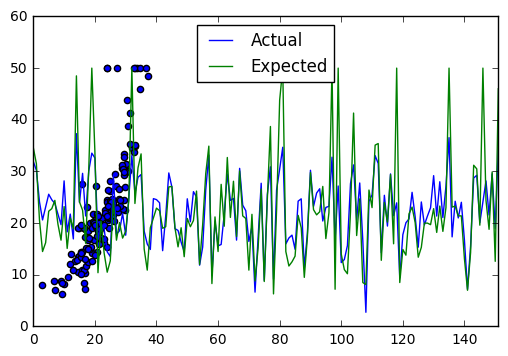

In [50]:
# TODO explore other plotting modules
df.plot()
plt.scatter(estimator.predict(X_test), y_test)
plt.show()